In [1]:
import torch
from PIL import Image, ImageGrab

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/home/davendra/Documents/uoft/capstone/NAS-results/yolov5m_nas_2/weights/best.pt')

Using cache found in /home/davendra/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-3-31 Python-3.10.6 torch-1.13.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3060, 12031MiB)

Fusing layers... 
YOLOv5m_nas_2 summary: 212 layers, 22825137 parameters, 0 gradients, 47.9 GFLOPs
Adding AutoShape... 


In [4]:
# Images
im1 = Image.open('/home/davendra/Documents/uoft/capstone/datasets/VOC/valid/images/2012_004331_jpg.rf.cd71cef7014153c5fa9fe54784b1f520.jpg')

model.eval()

results = model(im1, 416)

results.print()
results.save()  # or .show()

results.xyxy[0]  # im1 predictions (tensor)
results.pandas().xyxy[0]  # im1 predictions (pandas)

image 1/1: 416x416 2 persons
Speed: 2.1ms pre-process, 7.3ms inference, 0.8ms NMS per image at shape (1, 3, 416, 416)
Saved 1 image to runs/detect/exp19


,xmin,ymin,xmax,ymax,confidence,class,name
0,204.070312,210.373306,391.020874,406.760559,0.517481,14,person
1,79.040466,34.719711,166.527863,319.002136,0.420698,14,person


In [5]:
results.xywhn[0]
results.pandas().xywhn[0]  # im1 predictions (pandas)

,xcenter,ycenter,width,height,confidence,class,name
0,0.715254,0.741747,0.449400,0.472085,0.517481,14,person
1,0.295154,0.425146,0.210306,0.683371,0.420698,14,person


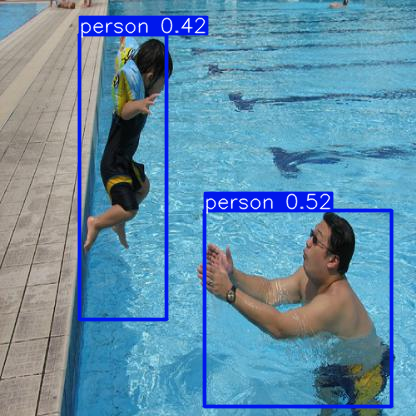

In [6]:
results.show()

In [14]:
import os

directory = '/home/davendra/Documents/uoft/capstone/datasets/subset_VOC/data/'
 
# iterate over files in
# that directory
for i, filename in enumerate(os.listdir(directory)):
    f = os.path.join(directory, filename)
    img = Image.open(f)
    results = model(im1, 416)
    results.xywhn[0]


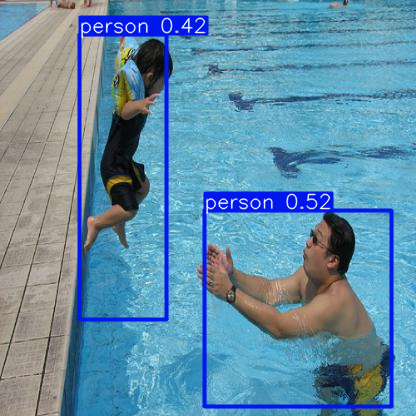

In [17]:
# dir(results)
# im1.size
results.show()

In [20]:
from pathlib import Path
Path('/home/yolo_pics')

PosixPath('/home/yolo_pics')